01 Import Libraries and Data

02 Create Time of Day Histogram

03 Create Loyalty Bar Chart

04 Compare Spending Levels by Hour of Day

05 Compare Age and Family Status

06 Compare Age and Spending Power

07 Export Visualizations

In [2]:
#import data libraries
import pandas as pd
import numpy as np
import os

In [3]:
#import viz libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
path = r'/Users/Owner/Documents/CareerFoundry/Data Immersion/Achievement 4/01-07-2024 Instacart Basket Analysis'

In [5]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [6]:
#check output
df.shape

(32404859, 32)

In [7]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,frequency_flag,First Name,Last Name,Gender,State,Age,Date_joined,Number_of_dependents,Marital_status,Income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,...,Frequent customer,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,prior,1,3,...,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,prior,3,4,...,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   product_id              int64  
 1   product_name            object 
 2   aisle_id                int64  
 3   department_id           int64  
 4   prices                  float64
 5   order_id                int64  
 6   user_id                 int64  
 7   eval_set                object 
 8   order_number            int64  
 9   order_dow               int64  
 10  order_hour_of_day       int64  
 11  days_since_prior_order  float64
 12  add_to_cart_order       int64  
 13  reordered               int64  
 14  Busiest Days            object 
 15  busiest_period_of_day   object 
 16  price_range_loc         object 
 17  max_order               int64  
 18  loyalty_flag            object 
 19  mean_spend              float64
 20  spending_flag           object 
 21  buy_freq                float

In [9]:
#rename order dow again. Please tell me why it's not staying renamed when I export?
df.rename(columns = {'order_dow' : 'orders_day_of_week'}, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   product_id              int64  
 1   product_name            object 
 2   aisle_id                int64  
 3   department_id           int64  
 4   prices                  float64
 5   order_id                int64  
 6   user_id                 int64  
 7   eval_set                object 
 8   order_number            int64  
 9   orders_day_of_week      int64  
 10  order_hour_of_day       int64  
 11  days_since_prior_order  float64
 12  add_to_cart_order       int64  
 13  reordered               int64  
 14  Busiest Days            object 
 15  busiest_period_of_day   object 
 16  price_range_loc         object 
 17  max_order               int64  
 18  loyalty_flag            object 
 19  mean_spend              float64
 20  spending_flag           object 
 21  buy_freq                float

For bar chart, histogram, scatterplot, and line chart code, see notebook "4.9 Creating Visualizations."

02 Create Time of Day Histogram

<Axes: ylabel='Frequency'>

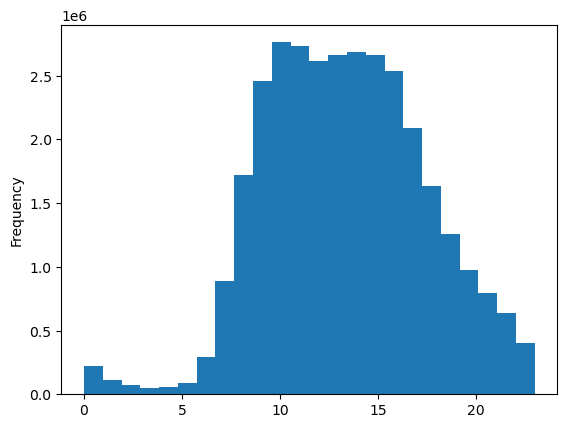

In [13]:
df['order_hour_of_day'].plot.hist(bins = 24)

The histogram shows that the largest number of orders occur from the 9th to the 16th hour of the day — in short, typical working hours. The company may want to use that information to schedule marketing emails or create messsaging around the convenience of ordering groceries at work.

03 Create Loyalty Bar Chart

<Axes: xlabel='loyalty_flag'>

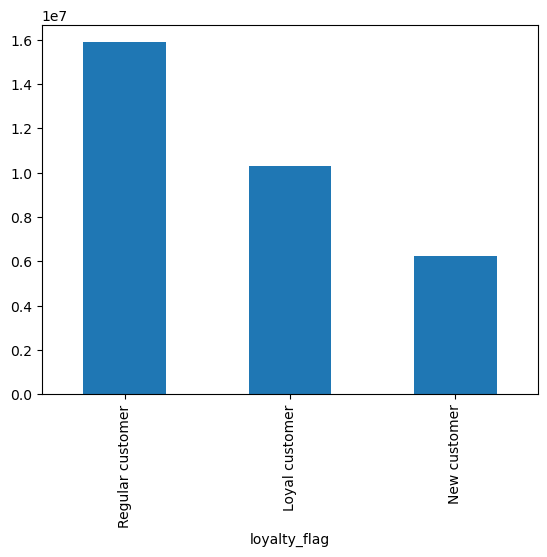

In [16]:
df['loyalty_flag'].value_counts().plot.bar()

It appears that regular customers place a larger volume of orders than loyal customers! This may be because there are more regular customers than loyal customers.

04 Compare Spending Levels by Hour of Day

In [19]:
#create a sampling of data
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [20]:
#check output
dev

array([False,  True, False, ...,  True,  True,  True])

In [21]:
#split dataframe
big = df[dev]
small = df[~dev]

In [22]:
#check output
len(df)

32404859

In [23]:
len(big) + len (small)

32404859

In [24]:
df_2 = small[['order_hour_of_day','prices']]

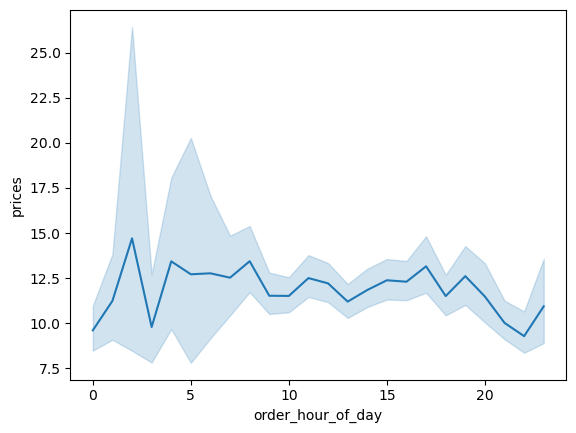

In [25]:
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

According to this chart, people buy less expensive products in the evenings, but spending starts to spike late at night. There is less consistency overnight but more consistency during daylight hours.

05 Comparing Age and Family Status

In [28]:
#create new small dataframe
df_3 = small[['Number_of_dependents','Age']]

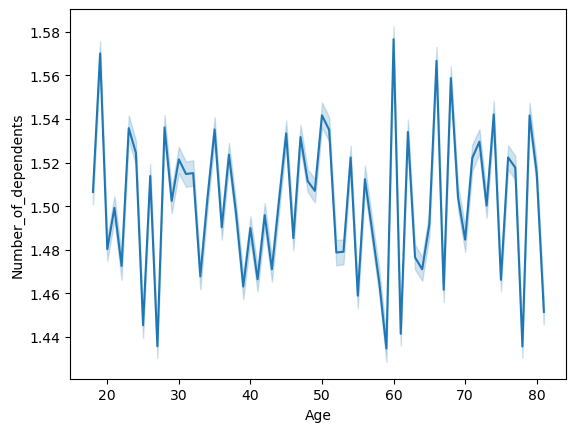

In [29]:
#create line chart
line = sns.lineplot(data = df_3, x = 'Age',y = 'Number_of_dependents')

This chart shows a significant variation in number of dependents across ages. I expected to see fewer dependents among the older age range but that appears not to be the case. 

06 Compare Age and Spending Power

<Axes: xlabel='Age', ylabel='Income'>

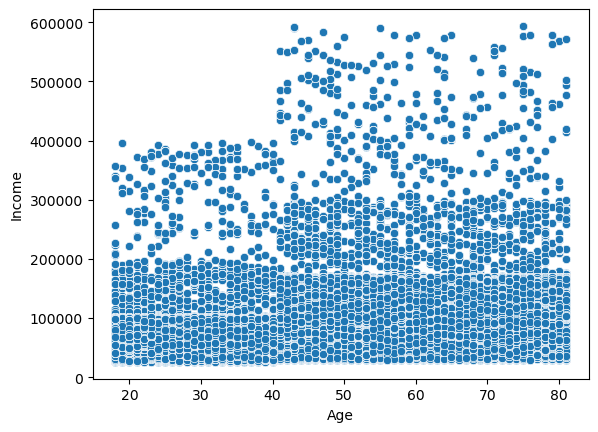

In [32]:
#create scatterplot
sns.scatterplot(x = 'Age', y = 'Income',data = df)

Customers 40 and over are more likely to have higher spending power than those under 40. There are no customers with income over 40 thousand in the younger group Those in the older group are more likely to hav ean income between 20,000 and 30,000 dollars. Relatedly, the number of customers with an income under 20,000 is slightly higher in the under-40 crowd.

07 Export Visualizations

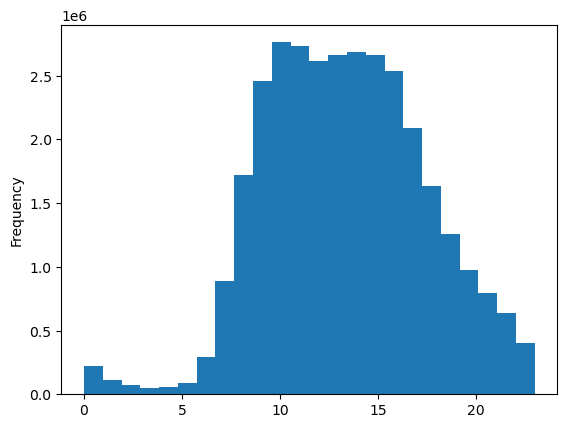

In [35]:
hist = df['order_hour_of_day'].plot.hist(bins = 24)

In [36]:
#export histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_freq_hours.png'))


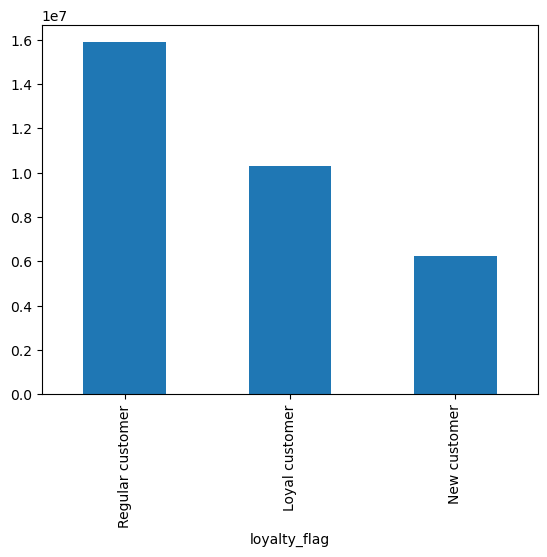

In [37]:
#create object for bar chart
bar = df['loyalty_flag'].value_counts().plot.bar()

In [63]:
#export bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_orders.png'),bbox_inches = 'tight')

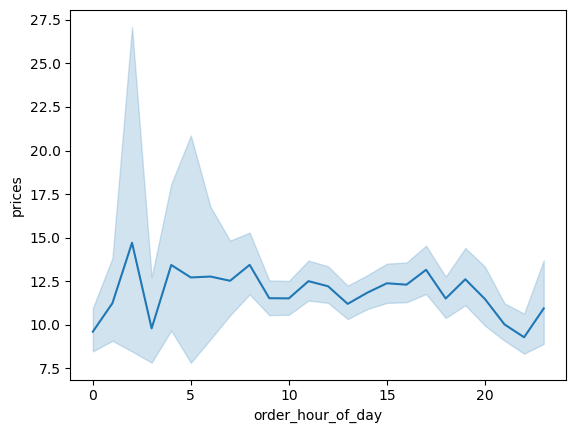

In [39]:
#create distinct object for first line chart
line_price_hour = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

In [40]:
#export first line chart
line_price_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_price_hour.png'))

In [41]:
#export second line chart as "line"
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependents.png'))

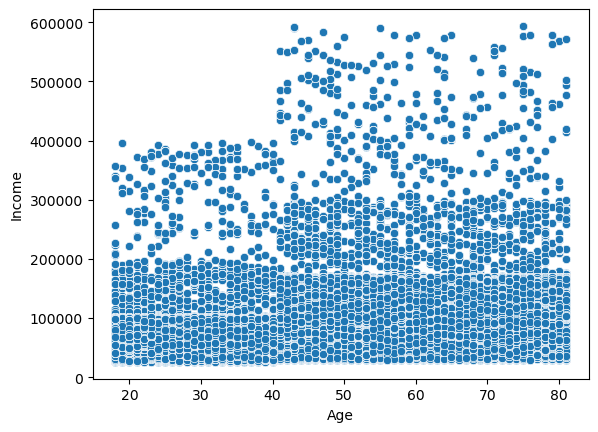

In [42]:
#create object for scatterplot
scat=sns.scatterplot(x = 'Age', y = 'Income',data = df)

In [43]:
#export scatterplot
scat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_age_income.png'))

<Axes: xlabel='frequency_flag'>

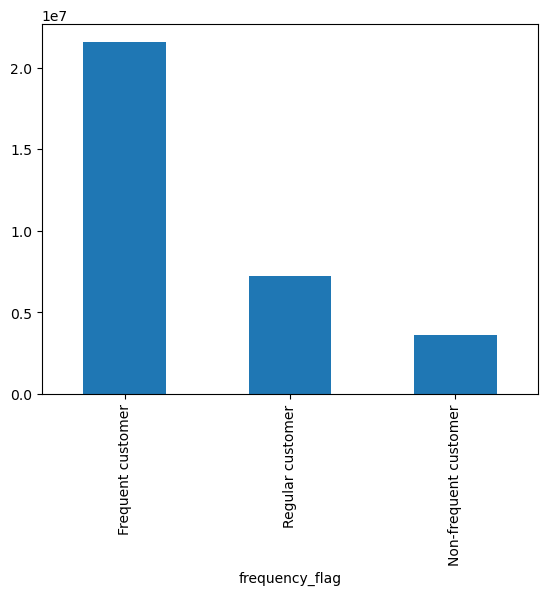

In [65]:
#create frequency bar chart
df['frequency_flag'].value_counts().plot.bar()

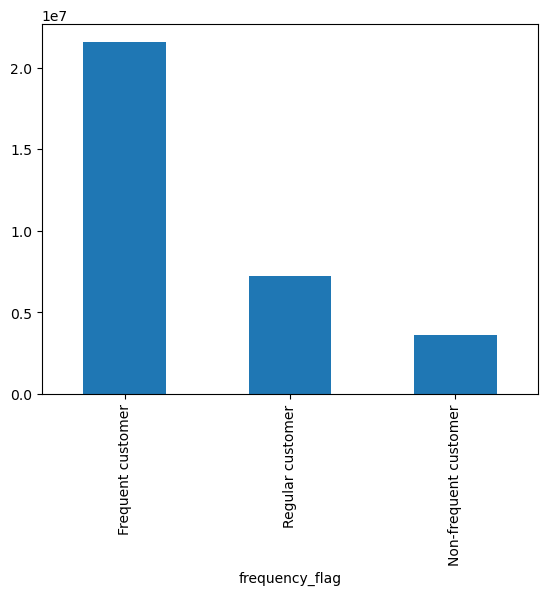

In [69]:
#create object for bar chart
bar_loyal = df['frequency_flag'].value_counts().plot.bar()

In [71]:
#export bar chart
bar_loyal.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_frequency_orders.png'),bbox_inches = 'tight')